In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import torchmetrics as tm
import torch
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# NN3 Grid search around learning rate - analysis

#### *Should be done with real returns and not winsorized returns*

In [2]:
cwd= os.getcwd()
resultsPath = cwd + '/../saved/results_old/'

In [3]:
NN3Path = resultsPath + 'NN3GridLearningRateTuning/'
predicted_ret_path = NN3Path + 'predicted_returns/'
trial_info_path = NN3Path + 'trial_info/'

In [4]:
predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

In [5]:
# spearman_coeffs = []
spearman_coeffs = {}
spearman = tm.SpearmanCorrCoef()

for idx,file in enumerate(predicted_ret_files):
    df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
    spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret']))
    # print(f'{idx} has spearman coefficient of {spear.item():.3f}')
    #spearman_coeffs.append(spear.item())
    trial_id = file.split('_')[0]
    spearman_coeffs[trial_id] = spear.item()

# learning_rates = []
learning_rates = {}

for idx, file in enumerate(trial_info_files):
    
    with open(trial_info_path + '/' + file, 'r') as f:
        data = json.load(f)
    learning_rate = (data['params']['learning_rate'])
    trial_id = file.split('_')[0] 
    # learning_rates.append(learning_rate)   
    learning_rates[trial_id] = learning_rate  


# Create df from dictionaries
spearman_df = pd.DataFrame(spearman_coeffs.items(), columns=['Id', 'Spearman_Coefficient'])
spearman_df['Id'] = spearman_df.Id.astype(int)
lr_df = pd.DataFrame(learning_rates.items(), columns=['Id', 'LR'])
lr_df['Id'] = lr_df.Id.astype(int)  

# Merge the two dfs
stats = spearman_df.merge(lr_df, on='Id')

/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [6]:
# NN3 Stats (Spearman and LR)
stats

,Id,Spearman_Coefficient,LR
0,16660091510851426,0.066010,0.000200
1,16659974587135558,0.067496,0.000058
2,16659573347656214,0.067707,0.000068
3,16659513093165372,0.067496,0.000058
4,16659745269030252,0.066878,0.000108
5,16659800526498780,0.065517,0.000126
6,16660035606077354,0.062892,0.000171
7,16659856484283236,0.062516,0.000147
8,16659687915781436,0.065737,0.000093
9,16659630756301174,0.067246,0.000079


## Add original point:

In [7]:
# 16647359418773646_trial_full
ETPath = resultsPath + 'ExpandingTuning/'
predicted_ret_path = ETPath + 'predicted_returns/'
trial_info_path = ETPath + 'trial_info/'

spearman = tm.SpearmanCorrCoef()
predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

for idx, file in enumerate(predicted_ret_files):
    file_split = file.split('_')
    if file_split[0] == '16647359418773646':
        df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
        original_spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret'])).item()


for idx, file in enumerate(trial_info_files):
    if file.split('_')[0] == '16647359418773646':
        with open(trial_info_path + '/' + file, 'r') as f:
            data = json.load(f)
        original_learning_rate = (data['params']['learning_rate'])


/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [8]:
original_spear

0.06550802719266571

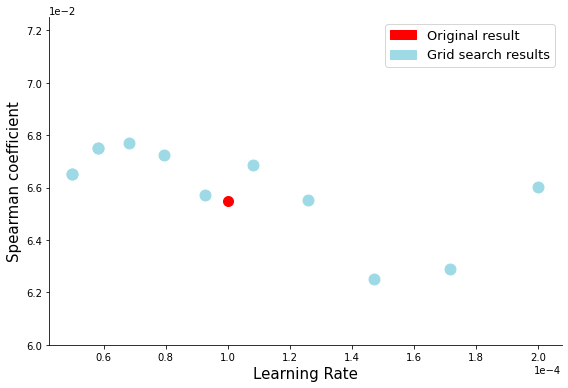

In [25]:
"""# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Learning rate vs. Spearman correlation coefficient')
plt.xlabel('Learning Rate')
plt.ylabel('Spearman coefficient')
plt.plot(original_learning_rate,original_spear,'ro')
plt.grid() #Keep?
plt.tight_layout()"""
# "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(8, 5.5))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'], color=tableau20[19], s=120)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.title('Learning rate vs. Spearman correlation coefficient', fontsize=18)
plt.ylabel('Spearman coefficient',fontsize=15)
# plt.xticks(np.linspace(0, 0.002, 0.01), fontsize=13)
# plt.yticks(np.linspace(0, 0.07, 0.01), fontsize=13)
plt.xlabel("Learning Rate", fontsize=15)
plt.ylim(.06, .0725)
plt.plot(original_learning_rate,original_spear,'ro', ms=10)
# plt.grid(color='gray', linestyle='--', linewidth=.15)
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Original result')
blue_patch = mpatches.Patch(color=tableau20[19], label='Grid search results')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=13)

plt.tight_layout()
plt.show()


# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
# plt.savefig("Returns_distribution.png", bbox_inches="tight")


# NN9 Grid search around learning rate - analysis

In [30]:
resultsPath = '../../saved/results/'

NN9Path = resultsPath + 'NN9GridLearningRateTuning/'
predicted_ret_path = NN9Path + 'predicted_returns/'
trial_info_path = NN9Path + 'trial_info/'

In [31]:
predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

In [32]:
# spearman_coeffs = []
spearman_coeffs = {}
spearman = tm.SpearmanCorrCoef()

for idx,file in enumerate(predicted_ret_files):
    df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
    spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret']))
    # print(f'{idx} has spearman coefficient of {spear.item():.3f}')
    #spearman_coeffs.append(spear.item())
    trial_id = file.split('_')[0]
    spearman_coeffs[trial_id] = spear.item()

# learning_rates = []
learning_rates = {}

for idx, file in enumerate(trial_info_files):
    
    with open(trial_info_path + '/' + file, 'r') as f:
        data = json.load(f)
    learning_rate = (data['params']['learning_rate'])
    trial_id = file.split('_')[0] 
    # learning_rates.append(learning_rate)   
    learning_rates[trial_id] = learning_rate  


# Create df from dictionaries
spearman_df = pd.DataFrame(spearman_coeffs.items(), columns=['Id', 'Spearman_Coefficient'])
spearman_df['Id'] = spearman_df.Id.astype(int)
lr_df = pd.DataFrame(learning_rates.items(), columns=['Id', 'LR'])
lr_df['Id'] = lr_df.Id.astype(int)  

# Merge the two dfs
stats = spearman_df.merge(lr_df, on='Id')

/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


KeyboardInterrupt: 

## Original point:

In [ ]:
# 16643916099395694_trial_full
original_trial_id = '16643916099395694'
ETPath = resultsPath + 'ExpandingTuning/'
predicted_ret_path = ETPath + 'predicted_returns/'
trial_info_path = ETPath + 'trial_info/'

predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

for idx, file in enumerate(predicted_ret_files):
    file_split = file.split('_')
    if file_split[0] == original_trial_id:
        df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
        original_spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret'])).item()


for idx, file in enumerate(trial_info_files):
    if file.split('_')[0] == original_trial_id:
        with open(trial_info_path + '/' + file, 'r') as f:
            data = json.load(f)
        original_learning_rate = (data['params']['learning_rate'])

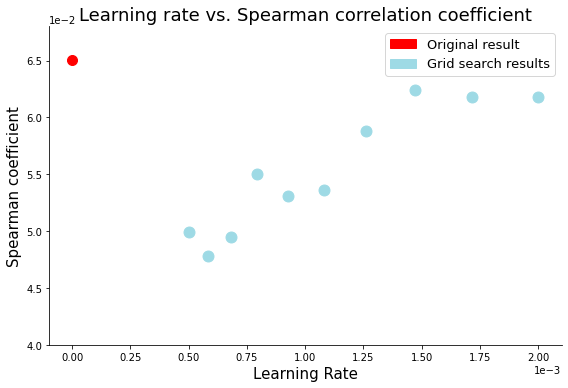

In [ ]:
# "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(8, 5.5))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()


# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'], color=tableau20[19], s=120)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Learning rate vs. Spearman correlation coefficient', fontsize=18)
plt.ylabel('Spearman coefficient',fontsize=15)
# plt.xticks(np.linspace(0, 0.002, 0.01), fontsize=13)
# plt.yticks(np.linspace(0, 0.07, 0.01), fontsize=13)
plt.xlabel("Learning Rate", fontsize=15)
plt.ylim(.04, .068)
plt.plot(original_learning_rate,original_spear,'ro', ms=10)
# plt.grid(color='gray', linestyle='--', linewidth=.1)
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Original result')
blue_patch = mpatches.Patch(color=tableau20[19], label='Grid search results')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=13)

plt.tight_layout()
plt.show()


# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
# plt.savefig("Returns_distribution.png", bbox_inches="tight")


# Gu et al's grid search around learning rate - analysis

In [26]:
# Calculate all GridTuning1 spearman coefficients and check which is the best, can we say I used that architecture for the next step?
GuGrid1Path = resultsPath + 'GuExperiment1/'
predicted_ret_path = GuGrid1Path + 'predicted_returns/'
trial_info_path = GuGrid1Path + 'trial_info/'

predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

In [27]:
# spearman_coeffs = []
spearman_coeffs = {}
spearman = tm.SpearmanCorrCoef()

for idx,file in enumerate(predicted_ret_files):
    df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
    spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret']))
    # print(f'{idx} has spearman coefficient of {spear.item():.3f}')
    #spearman_coeffs.append(spear.item())
    trial_id = file.split('_')[0]
    spearman_coeffs[trial_id] = spear.item()

# learning_rates = []
learning_rates = {}
results_df = pd.DataFrame()
for idx, file in enumerate(trial_info_files):
    
    with open(trial_info_path + '/' + file, 'r') as f:
        data = json.load(f)
    learning_rate = (data['params']['learning_rate'])
    l1_lambda = data['params']['l1_lambda1']
    adam_beta1 = data['params']['adam_beta_1']
    adam_beta2 = data['params']['adam_beta_2']
    trial_id = file.split('_')[0] 
    # learning_rates[trial_id] = learning_rate  
    temp_df = pd.DataFrame(data['params'], index=[0])
    temp_df['Id'] = trial_id
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Create df from dictionaries
spearman_df = pd.DataFrame(spearman_coeffs.items(), columns=['Id', 'Spearman_Coefficient'])
spearman_df['Id'] = spearman_df.Id.astype(int)
# lr_df = pd.DataFrame(learning_rates.items(), columns=['Id', 'LR'])
# lr_df['Id'] = lr_df.Id.astype(int)  

# Merge the two dfs
# stats = spearman_df.merge(lr_df, on='Id')
spearman_df.Id = spearman_df.Id.astype(int)
results_df.Id = results_df.Id.astype(int)
stats = spearman_df.merge(results_df, on='Id')

/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [28]:
stats.sort_values(by='Spearman_Coefficient', ascending=False)

,Id,Spearman_Coefficient,learning_rate,l1_lambda1,adam_beta_1,adam_beta_2
2,16641446857256002,0.070277,0.010,0.00001,0.8,0.999
8,16641537519500850,0.069392,0.010,0.00001,0.9,0.999
3,16641354041604962,0.067436,0.005,0.00001,0.9,0.999
1,16641445558551988,0.066434,0.010,0.00001,0.8,0.990
4,16641340448865242,0.066318,0.005,0.00001,0.9,0.990
11,16641534819056638,0.066263,0.010,0.00001,0.9,0.990
6,16641258163301814,0.065895,0.005,0.00001,0.8,0.999
7,16641080896201272,0.065260,0.001,0.00001,0.8,0.990
0,16641164093398536,0.065035,0.001,0.00001,0.9,0.990
5,16641164443646428,0.064378,0.001,0.00001,0.9,0.999


In [29]:
stats.groupby(['l1_lambda1', 'adam_beta_1', 'adam_beta_2'])['Spearman_Coefficient'].mean()

l1_lambda1  adam_beta_1  adam_beta_2
0.00001     0.8          0.990          0.064507
                         0.999          0.066610
            0.9          0.990          0.065872
                         0.999          0.067069
Name: Spearman_Coefficient, dtype: float64

## Part 2 Grid search

Hyperparameters:
- Learning rate: tunable between 0.01 and 0.1
- Adam Beta 1: 0.9
- Adam Beta 2: 0.999
- L1 lambda: 1e-5

In [30]:
GuPart2Path = resultsPath + 'GuExperiment2/'
predicted_ret_path = GuPart2Path + 'predicted_returns/'
trial_info_path = GuPart2Path + 'trial_info/'

predicted_ret_files = [f for f in listdir(predicted_ret_path) if isfile(join(predicted_ret_path, f))]
trial_info_files = [f for f in listdir(trial_info_path) if isfile(join(trial_info_path, f))]

In [31]:
# spearman_coeffs = []
spearman_coeffs = {}
spearman = tm.SpearmanCorrCoef()

for idx,file in enumerate(predicted_ret_files):
    df = pd.read_csv(predicted_ret_path + '/' + file, index_col=0)
    spear = spearman(torch.tensor(df['predicted_ret']), torch.tensor(df['ret']))
    # print(f'{idx} has spearman coefficient of {spear.item():.3f}')
    #spearman_coeffs.append(spear.item())
    trial_id = file.split('_')[0]
    spearman_coeffs[trial_id] = spear.item()

# learning_rates = []
learning_rates = {}

for idx, file in enumerate(trial_info_files):
    
    with open(trial_info_path + '/' + file, 'r') as f:
        data = json.load(f)
    learning_rate = (data['params']['learning_rate'])
    trial_id = file.split('_')[0] 
    # learning_rates.append(learning_rate)   
    learning_rates[trial_id] = learning_rate  


# Create df from dictionaries
spearman_df = pd.DataFrame(spearman_coeffs.items(), columns=['Id', 'Spearman_Coefficient'])
spearman_df['Id'] = spearman_df.Id.astype(int)
lr_df = pd.DataFrame(learning_rates.items(), columns=['Id', 'LR'])
lr_df['Id'] = lr_df.Id.astype(int)  

# Merge the two dfs
stats = spearman_df.merge(lr_df, on='Id')

/home/ge65cuw/anaconda3/envs/thesis/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [33]:
stats

,Id,Spearman_Coefficient,LR
0,16642690802510898,0.067883,0.07
1,16642687911177632,0.067229,0.04
2,16642485897315580,0.067514,0.03
3,16642795827826356,0.064505,0.05
4,16642875036405952,0.069392,0.01
5,16642900936681954,0.068359,0.10
6,16642587372883304,0.065636,0.02
7,16642579882697944,0.070012,0.08
8,16642774169001760,0.067296,0.09
9,16642485896997488,0.066859,0.06


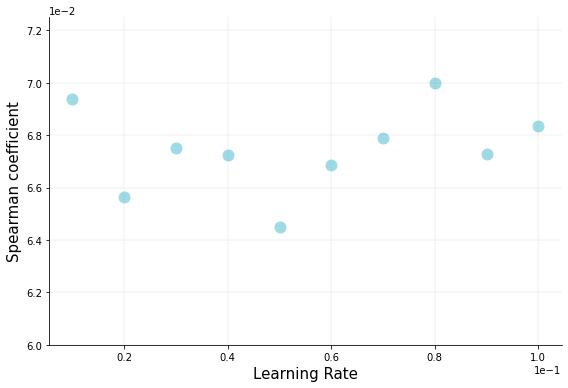

In [36]:
"""# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Learning rate vs. Spearman correlation coefficient')
plt.xlabel('Learning Rate')
plt.ylabel('Spearman coefficient')
plt.plot(original_learning_rate,original_spear,'ro')
plt.grid() #Keep?
plt.tight_layout()"""
# "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(8, 5.5))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Plot
plt.scatter(stats['LR'], stats['Spearman_Coefficient'], color=tableau20[19], s=120)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Spearman coefficient',fontsize=15)
plt.xlabel("Learning Rate", fontsize=15)
plt.ylim(.06, .0725)
plt.grid(color='gray', linestyle='--', linewidth=.15)
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Original result')
blue_patch = mpatches.Patch(color=tableau20[19], label='Grid search results')
# plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=13)

plt.tight_layout()
plt.show()


# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.
# plt.savefig("Returns_distribution.png", bbox_inches="tight")
